# TF Slim - finetuning

## Finetune Inception V1 on flowers

In [1]:
HOME = %pwd if HOME is None else HOME
SLIM = HOME + '/models/research/slim'
TMP = HOME + '/tmp'
DATA = HOME + '/data'
AVA=DATA + '/ava'
TID=DATA + '/tid'


In [2]:
%cd $SLIM
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import tensorflow as tf
import time

from datasets import dataset_utils

# Main slim library
from tensorflow.contrib import slim

/dev.snappi/tensorflow/a-lamp/models/research/slim


In [3]:
import tensorflow as tf
# from datasets import dataset_utils, convert_nima_tid
# convert_nima_tid.run(TID)

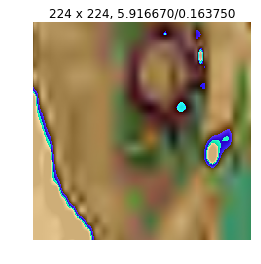

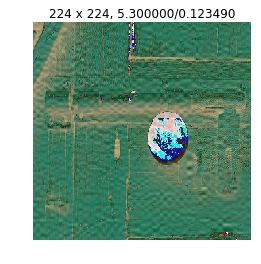

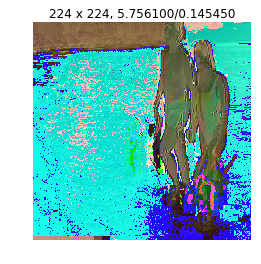

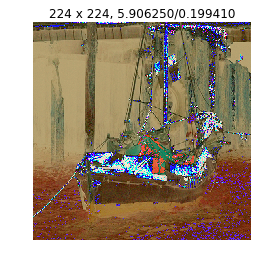

In [4]:
from datasets import nima_tid
import tensorflow as tf
from preprocessing import preprocessing_factory
from tensorflow.contrib import slim

nima_preprocessing = preprocessing_factory.get_preprocessing('nima', is_training=True)

with tf.Graph().as_default(): 
    dataset = nima_tid.get_split('train', TID)
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, mean, stddev = data_provider.get(['image', 'mean', 'stddev'])
    
    # apply preprocessing
    image = nima_preprocessing(image, 224,224, resize_side_min=255, resize_side_max=255)

        
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(4):
                np_image, np_mean, np_stddev = sess.run([image, mean, stddev])
                height, width, _ = np_image.shape
                
                plt.figure()
                plt.imshow(np_image)
                plt.title('%d x %d, %f/%f' % (height, width, np_mean, np_stddev))
                plt.axis('off')
                plt.show()